In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
torch.cuda.is_available()

True

### Hyper-Parameters

In [19]:
batch_size = 4
lr = 0.001
num_epochs = 10
seed = 42
model_path = './model.ckpt' 

### Load Data

In [11]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [12]:
device=torch.device('cuda:0')

### Define Network

In [21]:
class LeNet(torch.nn.Module):
	def __init__(self):
		super().__init__()
		self.conv1 = torch.nn.Conv2d(3, 6, 5)
		self.pool = torch.nn.MaxPool2d(2, 2)
		self.conv2 = torch.nn.Conv2d(6, 16, 5)
		self.fc1 = torch.nn.Linear(16 * 5 * 5, 120)
		self.fc2 = torch.nn.Linear(120, 84)
		self.fc3 = torch.nn.Linear(84, 10)

	def forward(self, x):
		x = self.pool(F.relu(self.conv1(x)))
		x = self.pool(F.relu(self.conv2(x)))
		x = torch.flatten(x, 1)
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = self.fc3(x)
		return x
	
net = LeNet().to(device)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

### Train Data

In [23]:
loss_data = []
acc_data = []

for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch + 1, num_epochs))
    train_acc, train_loss = 0.0, 0.0
    total = 0
    net.train()
    for i, data in tqdm(enumerate(trainloader, 0)):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_acc += (predicted == labels).sum().item()
        total += labels.size(0)
        if i % 2500 == 2499:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, train_loss / 1000))
            # train_loss = 0.0
    
    loss_data.append(train_loss)
    acc_data.append(train_acc / total)
    

print('Finished Training')
print('loss_data = ', loss_data)
print('acc_data = ', acc_data)


Epoch 1/10


2545it [00:08, 323.76it/s]

[1,  2500] loss: 5.364


5051it [00:16, 285.16it/s]

[1,  5000] loss: 9.744


7550it [00:25, 270.35it/s]

[1,  7500] loss: 13.709


10053it [00:34, 301.49it/s]

[1, 10000] loss: 17.439


12500it [00:42, 293.30it/s]

[1, 12500] loss: 21.023
Epoch 2/10



2556it [00:08, 279.89it/s]

[2,  2500] loss: 3.397


5027it [00:16, 284.66it/s]

[2,  5000] loss: 6.776


7546it [00:25, 329.57it/s]

[2,  7500] loss: 10.077


10051it [00:33, 328.05it/s]

[2, 10000] loss: 13.313


12500it [00:41, 304.19it/s]

[2, 12500] loss: 16.490
Epoch 3/10



2532it [00:07, 316.85it/s]

[3,  2500] loss: 3.050


5049it [00:15, 308.75it/s]

[3,  5000] loss: 6.083


7553it [00:23, 328.95it/s]

[3,  7500] loss: 9.125


10041it [00:31, 314.72it/s]

[3, 10000] loss: 12.042


12500it [00:38, 322.55it/s]

[3, 12500] loss: 14.954
Epoch 4/10



2561it [00:07, 320.90it/s]

[4,  2500] loss: 2.710


5051it [00:15, 331.74it/s]

[4,  5000] loss: 5.544


7544it [00:23, 328.97it/s]

[4,  7500] loss: 8.320


10042it [00:30, 331.09it/s]

[4, 10000] loss: 11.091


12500it [00:38, 323.21it/s]

[4, 12500] loss: 13.849
Epoch 5/10



2547it [00:08, 309.13it/s]

[5,  2500] loss: 2.541


5039it [00:17, 275.16it/s]

[5,  5000] loss: 5.173


7528it [00:25, 270.59it/s]

[5,  7500] loss: 7.802


10038it [00:34, 253.78it/s]

[5, 10000] loss: 10.422


12500it [00:43, 287.68it/s]

[5, 12500] loss: 13.056
Epoch 6/10



2552it [00:08, 288.42it/s]

[6,  2500] loss: 2.391


5047it [00:17, 290.25it/s]

[6,  5000] loss: 4.863


7550it [00:25, 296.69it/s]

[6,  7500] loss: 7.356


10056it [00:34, 313.89it/s]

[6, 10000] loss: 9.827


12500it [00:42, 296.61it/s]

[6, 12500] loss: 12.335
Epoch 7/10



2544it [00:09, 294.49it/s]

[7,  2500] loss: 2.254


5045it [00:17, 289.53it/s]

[7,  5000] loss: 4.604


7534it [00:25, 306.60it/s]

[7,  7500] loss: 6.941


10047it [00:33, 308.00it/s]

[7, 10000] loss: 9.317


12500it [00:41, 298.46it/s]

[7, 12500] loss: 11.776
Epoch 8/10



2553it [00:08, 287.15it/s]

[8,  2500] loss: 2.122


5035it [00:16, 317.12it/s]

[8,  5000] loss: 4.307


7541it [00:24, 287.89it/s]

[8,  7500] loss: 6.561


10044it [00:32, 294.01it/s]

[8, 10000] loss: 8.888


12500it [00:41, 303.76it/s]

[8, 12500] loss: 11.226
Epoch 9/10



2558it [00:08, 314.13it/s]

[9,  2500] loss: 2.052


5056it [00:17, 308.74it/s]

[9,  5000] loss: 4.195


7546it [00:24, 314.23it/s]

[9,  7500] loss: 6.404


10033it [00:33, 312.11it/s]

[9, 10000] loss: 8.631


12500it [00:41, 302.28it/s]

[9, 12500] loss: 10.806
Epoch 10/10



2550it [00:08, 282.80it/s]

[10,  2500] loss: 1.967


5052it [00:16, 291.47it/s]

[10,  5000] loss: 4.017


7560it [00:24, 289.97it/s]

[10,  7500] loss: 6.094


10065it [00:32, 318.30it/s]

[10, 10000] loss: 8.245


12500it [00:40, 309.99it/s]

[10, 12500] loss: 10.424
Finished Training
loss_data =  [21022.945020630956, 16490.48629105091, 14954.013948675245, 13848.812426542863, 13056.172512258403, 12334.67653157143, 11775.602065756917, 11226.495392677258, 10806.487313002232, 10423.79402381857]
acc_data =  [0.383, 0.52678, 0.57756, 0.60824, 0.63286, 0.65328, 0.66702, 0.68266, 0.69524, 0.7051]


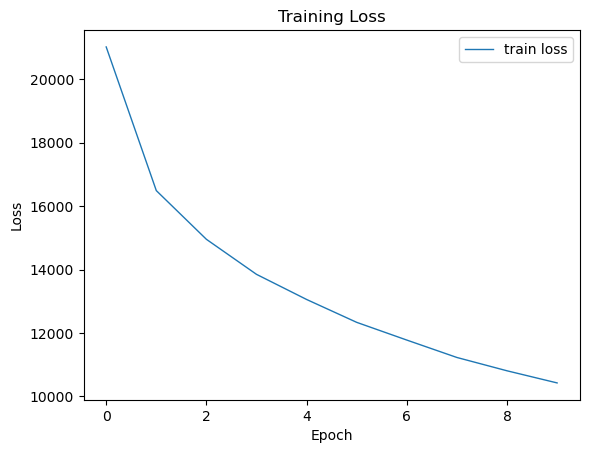

In [24]:
x_train_loss = range(num_epochs)
y_train_loss = loss_data
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.plot(x_train_loss, y_train_loss, linewidth=1, linestyle='solid', label='train loss')
plt.legend()
plt.show()

In [25]:
torch.save(net.state_dict(), model_path)

### Test Data

In [26]:
correct, total = 0, 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
with torch.no_grad():
	for data in testloader:
		images, labels = data[0].to(device), data[1].to(device)
		outputs = net(images)
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		correct += (predicted == labels).sum().item()
		for label, prediction in zip(labels, predicted):
			if label == prediction:
				correct_pred[classes[label]] += 1
			total_pred[classes[label]] += 1

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

for classname, correct_count in correct_pred.items():
	accuracy = 100 * float(correct_count) / total_pred[classname]
	print("Accuracy for class {:5s} is: {:.1f} %, the total testcases for this class is {:}".format(classname, accuracy, total_pred[classname]))

Accuracy of the network on the 10000 test images: 62 %
Accuracy for class plane is: 69.9 %, the total testcases for this class is 1000
Accuracy for class car   is: 72.1 %, the total testcases for this class is 1000
Accuracy for class bird  is: 46.6 %, the total testcases for this class is 1000
Accuracy for class cat   is: 40.0 %, the total testcases for this class is 1000
Accuracy for class deer  is: 60.9 %, the total testcases for this class is 1000
Accuracy for class dog   is: 49.8 %, the total testcases for this class is 1000
Accuracy for class frog  is: 65.2 %, the total testcases for this class is 1000
Accuracy for class horse is: 75.6 %, the total testcases for this class is 1000
Accuracy for class ship  is: 74.4 %, the total testcases for this class is 1000
Accuracy for class truck is: 70.8 %, the total testcases for this class is 1000
